In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'./Olympic/athlete_events.csv')
data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

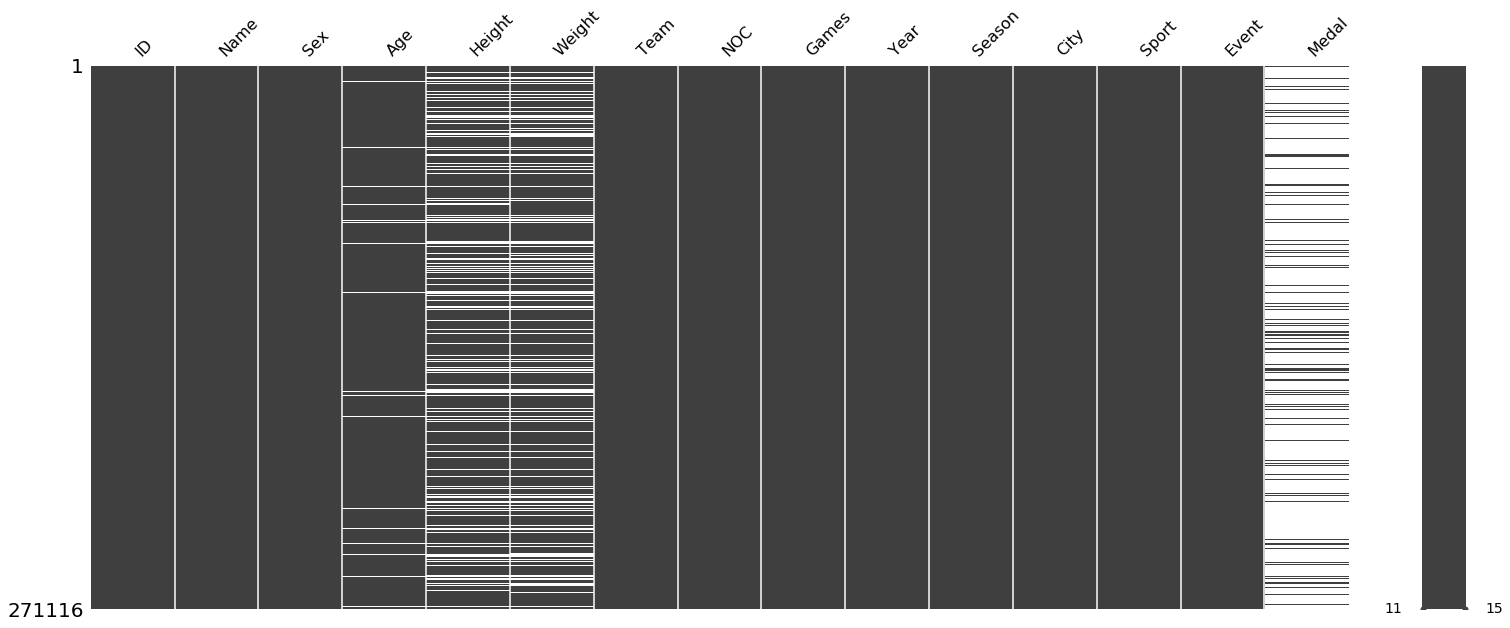

In [5]:
msno.matrix(data)
#可以看到有缺失值
data_1 = data.drop(['Medal'],axis=1) #剔除Medal缺失值影响

In [6]:
data_1 = data_1.dropna()


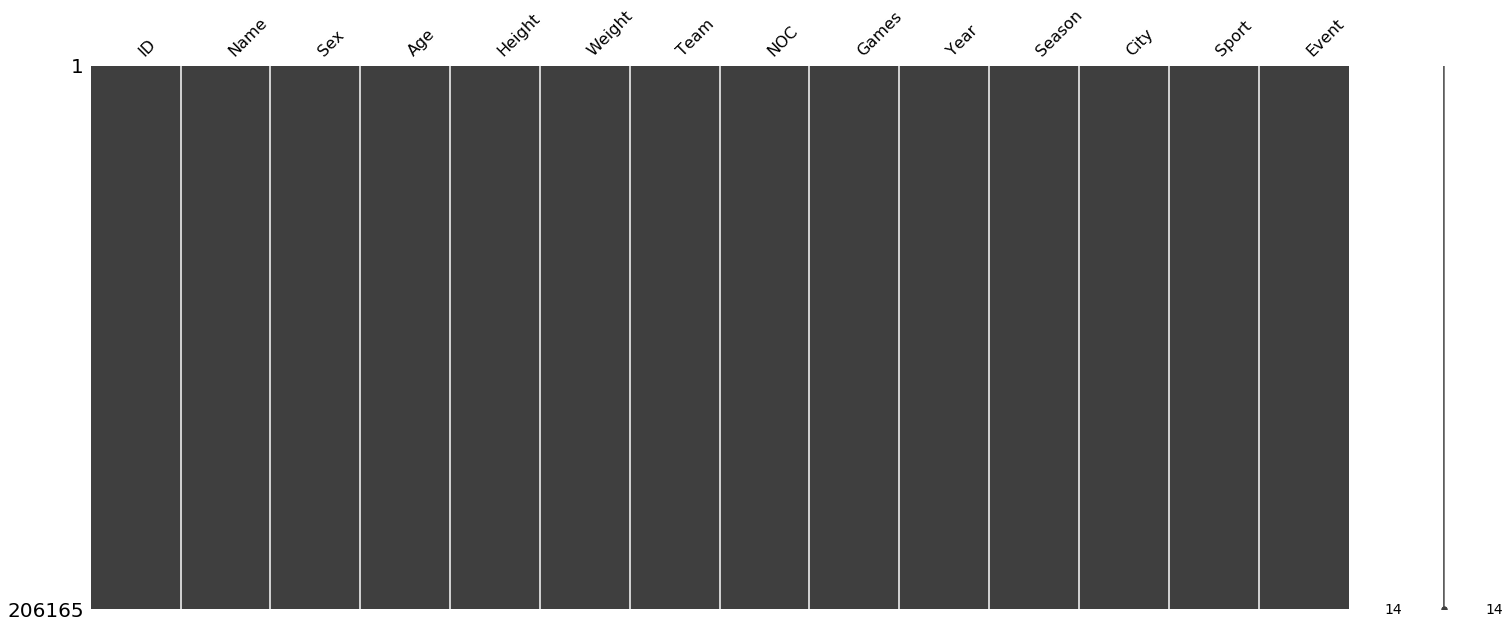

In [7]:
msno.matrix(data_1)

In [8]:
from pyecharts import Pie,Bar,Line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
sex_info = data_1['Sex'].value_counts()
sex_info.index
sex_info.values

Index(['M', 'F'], dtype='object')

array([139454,  66711])

In [10]:
pie_sex = Pie('男女比例表')
pie_sex.add('性别比例',['男','女'],sex_info.values,is_legend_show=True,is_label_show=True,rose_type='area',is_random=True)
pie_sex

In [11]:
#基于男女分类分析,构建男性信息表
data_man = data_1[True - data_1['Sex'].isin(['F'])]
data_man.head(10)

#构建女性信息表
data_woman = data_1[True - data_1['Sex'].isin(['M'])]
data_woman.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres
15,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres
16,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...
17,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres"
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres"
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres"
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer
34,14,Pirjo Hannele Aalto (Mattila-),F,32.0,171.0,65.0,Finland,FIN,1994 Winter,1994,Winter,Lillehammer,Biathlon,Biathlon Women's 7.5 kilometres Sprint
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight


In [12]:
data_man.size
data_woman.size

1952356

933954

In [13]:
#参赛男性年龄分组
data_man['Age'].unique().size

#参赛女性年龄分组
data_woman['Age'].unique().size

59

55

In [14]:
#统计参赛男性年龄频次
age_man = data_man['Age'].value_counts()

#统计参赛女性年龄频次
age_woman = data_woman['Age'].value_counts()

#年龄排序因为Index的类型不是int类型，进行转换
a = age_man.index.astype(int)
age_man = age_man.sort_index()
b = age_woman.index.astype(int)
age_woman = age_woman.sort_index()

age_man.index

Float64Index([12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
              23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0,
              34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0,
              45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0,
              56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0,
              67.0, 68.0, 70.0, 71.0],
             dtype='float64')

In [15]:
#画出年龄图
line_a = Line('男女年龄对照表')
line_a.add('男性',age_man.index,age_man.values,mark_point=['max','min'],is_more_utils=True)
line_a.add('女性',age_woman.index,age_woman.values,mark_point=['max','min'],is_more_utils=True)
line_a

In [16]:
#统计参赛男性身高频次
height_man = data_man['Height'].value_counts()

#统计参赛女性身高频次
height_woman = data_woman['Height'].value_counts()

#年龄排序因为Index的类型不是int类型，进行转换
a_h = height_man.index.astype(int)
height_man = height_man.sort_index()
b_h = height_woman.index.astype(int)
height_woman = height_woman.sort_index()

In [17]:
#画出身高图
bar_h = Bar('男女身高对照表')
bar_h.add('男性',height_man.index,height_man.values,is_more_utils=True)
bar_h.add('女性',height_woman.index,height_woman.values,is_more_utils=True)
bar_h

In [18]:
#统计参赛男性体重频次
weight_man = data_man['Weight'].value_counts()

#统计参赛女性体重频次
weight_woman = data_woman['Weight'].value_counts()

#年龄排序因为Index的类型不是int类型，进行转换
a_2 = weight_man.index.astype(int)
weight_man = weight_man.sort_index()
b_2 = weight_woman.index.astype(int)
weight_woman = weight_woman.sort_index()

In [19]:
#画出体重图
bar_w = Bar('男女身高对照表')
bar_w.add('男性',weight_man.index,weight_man.values,is_more_utils=True)
bar_w.add('女性',weight_woman.index,weight_woman.values,is_more_utils=True)
bar_w